## Memprediksi Harga Jual Rumah

Tujuan dari proyek ini adalah membangun model Machine Learning untuk memprediksi harga jual rumah berdasarkan berbagai variabel penjelas yang menggambarkan aspek rumah hunian.


### Mengapa ini penting?

Memprediksi harga rumah berguna untuk mengidentifikasi investasi yang menguntungkan atau untuk menentukan apakah harga rumah yang diiklankan di atas atau di bawah perkiraan.


### Apa tujuan dari model Machine Learning?

Bertujuan untuk meminimalkan perbedaan antara harga sebenarnya dan harga yang diperkirakan oleh model. <br>
Model akan mengevaluasi performa model dengan:

1. mean squared error (mse)
2. akar pangkat dua dari kesalahan kuadrat rata-rata (rmse)
3. r-score (r2).

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

#spliiting data train and test
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Function
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

In [2]:
# load dataset
data = pd.read_csv('C:/Users/hp/OneDrive/Documents/Belajar Pemrograman/jointscampUGM/dataset/train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dataset harga rumah berisi 1460 baris dan 80 kolom

79 adalah variabel prediktif dan 1 adalah variabel target: SalePrice

## Analisis

**Akan dianalisis hal-hal berikut:**

1. Variabel sasaran
2. Jenis variabel (kategorikal dan numerik)
3. Data yang hilang
4. Variabel numerik
     - Diskrit
     - Terus menerus
     - Distribusi
     - Transformasi

5. Variabel kategori
     - Kardinalitas
     - Label Langka
     - Pemetaan khusus

## Sasaran

Mari kita mulai dengan menjelajahi distribusi target.

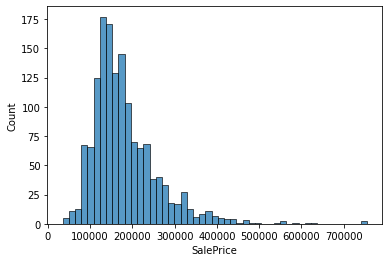

In [3]:
sns.histplot(data=data, x="SalePrice");

Diamati bahwa distribusi dari rumah mengalami skew positive atau menceng kanan, dan diamati bahwa kebanyakan rumah memiliki harga berkisar 100K hingga 300K

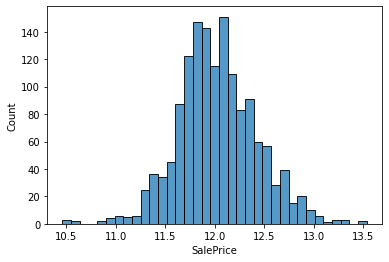

In [4]:
## Fitur Engineering
sns.histplot(np.log(data["SalePrice"]));

Diamati bahwa transformasi logaritma memberikan dampak pada persebaran data SalePrice menjadi distribusi normal.

<h1>Missing Values Analysis<h1>

In [5]:
missing(data)

,missing,percent_missing,types,n_unique
PoolQC,1453,99.52,object,3
MiscFeature,1406,96.30,object,4
Alley,1369,93.77,object,2
Fence,1179,80.75,object,4
FireplaceQu,690,47.26,object,5
...,...,...,...,...
ExterQual,0,0.00,object,4
Exterior2nd,0,0.00,object,16
Exterior1st,0,0.00,object,15
RoofMatl,0,0.00,object,8


In [6]:
# Rule of Thumb
# Buat variabel yang mengandung missing value lebih dari 50% karena biasanya masih bisa diekstrak informasinya

var_drop = [var for var in data.columns if data[var].isnull().sum()/len(data) > 0.5]
var_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
# Drop variabel mssing value tsb
data = data.drop(var_drop, axis=1)


In [8]:
# Drop kolom Id juga karena tidak mengandung informasi
data = data.drop("Id", axis=1)

<h3>Missing analize<h3>

In [9]:
#pisahkan variable categorical dan numerical

cat_vars = [var for var in data.columns if data[var].dtype == 'O']
# MSsubClass adalah categorical variable awalnya lalu di encode jadi angka, masukkan ke cat_vars
# Info dari data desc di Kaggle mengatakan gitu
cat_vars = cat_vars + ['MSSubClass']


num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice'] 

In [10]:
# membuat list baru yang menampung variable nan untuk dianalisis
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]


data[vars_with_na].isnull().mean().sort_values(ascending=False)

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [11]:
#pisahkan data catgorical dan numerikal untuk mempermudah analisa missing
cat_na = [var for var in cat_vars if var in vars_with_na] # kategorikal missing value
num_na = [var for var in num_vars if var in vars_with_na] # numerical missing vlaue

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  12
Number of numerical variables with na:  3


In [12]:
## Membuat fungsi untuk memvisualisasikan apakah missing value mengandung informasi atau tidak
def analyse_na_value(df, var):
    #membuat backup
    df = df.copy()

    #observasi missing values dengan melakukan encoding, 1 adalah missing dan 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0) # Mirip IF ELSE if isnull == 1; else == 0

    #create grup by untuk analisa rata rata sales price
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

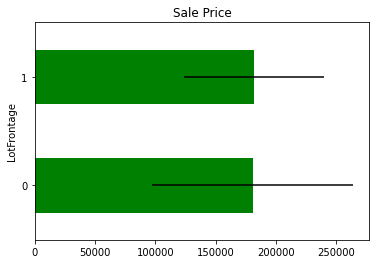

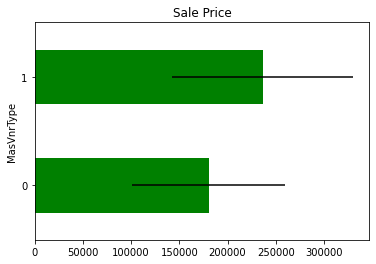

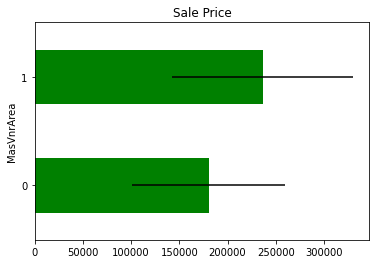

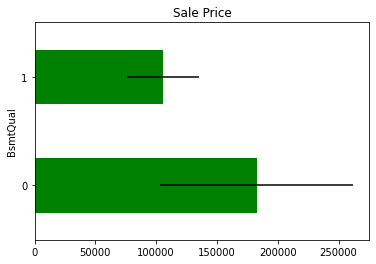

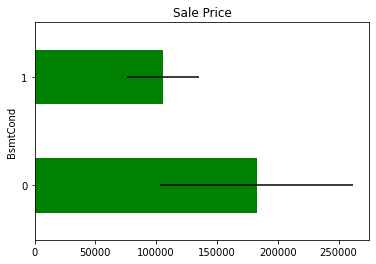

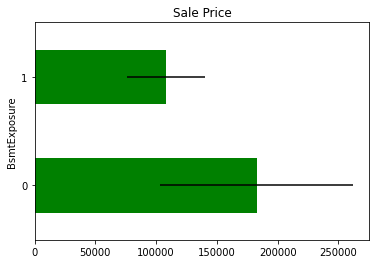

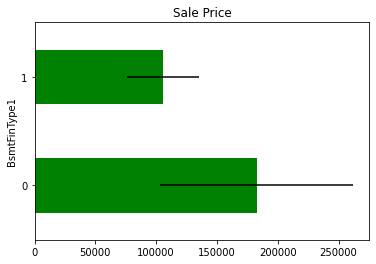

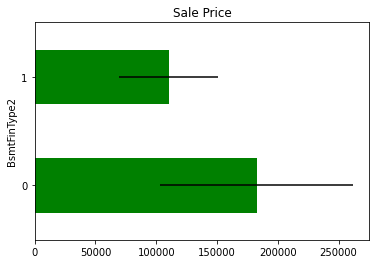

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


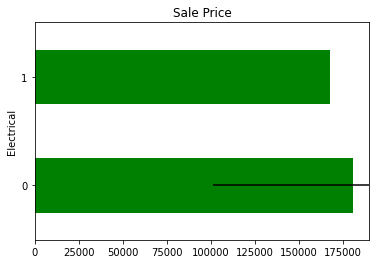

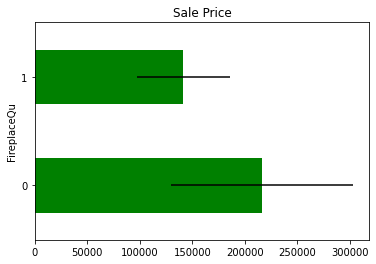

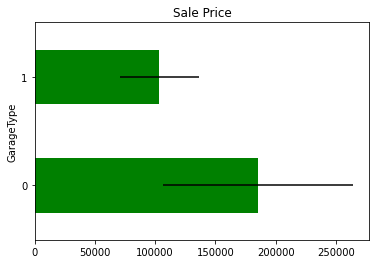

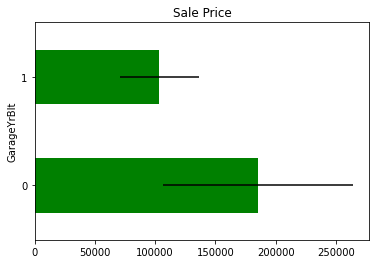

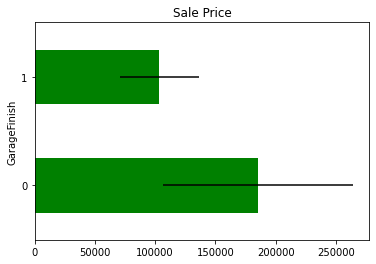

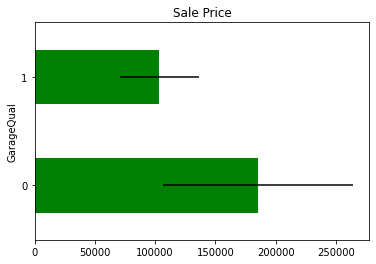

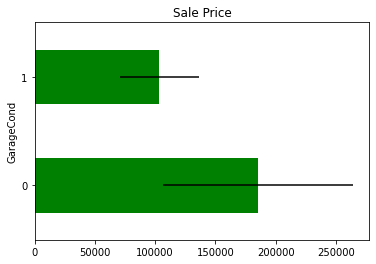

In [13]:
#looping
for var in vars_with_na:
    analyse_na_value(data, var)

Diamati bahwa beberapa variable yang mangandung missing memberikan sebuah informasi, hal ini terlihat dari perbedaan rata ratanya. Variable selain LotFrontAge adalah predictor yang bagus.

# Feature Engineering: Creation
# Temporal Variables

Disini kita memiliki 4 variable waktu yaitu : <br>

- YearBuilt: tahun rumah dibangun
- YearRemodAdd: Tahun rumah di perbaiki
- GarageYrBlt:tahun garasi dibangun
- YrSold: tahun rumah di jual

kita dapat mengekstrak informasi pada 4 variable ini untuk di analisis, seperti Umur rumah = YrSold - YearBuilt.

In [14]:
# membuat list variable waktu

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Median House Price')

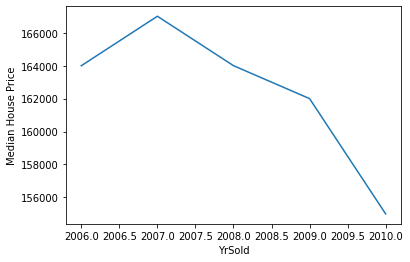

In [15]:
#plot median saleprice

# plor berdasar tahun terjual
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Terdapat kejanggalan atau anomali pada plot di atas. Terlihat bahwa setiap tahun harga rumah menurun, padahal biasanya semakin lama harga rumah semakin mahal. Maka dari itu, perlu dianalisis penyebab tren tersebut terjadi

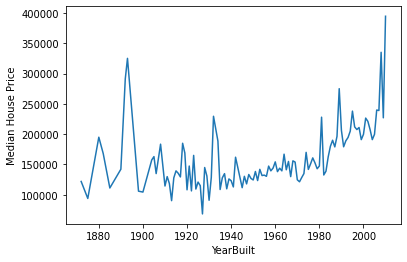

In [16]:
# plot berdasar tahun dibuat
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price');

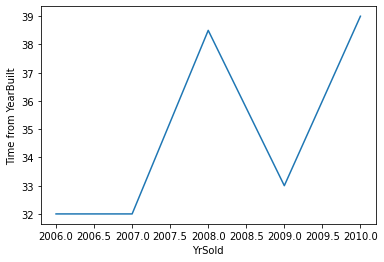

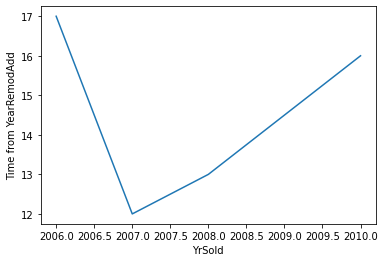

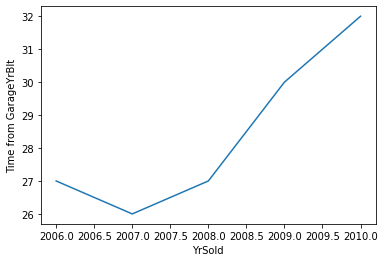

In [17]:
# Fungsi untuk melihat hubungan featur engineering dengan anomali yang terjadi pada plot saleprice dan yearsold di atas
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Dari tiga plot di atas (usia rumah, usia renovasi, dan usia garasi), terlihat bahwa menjelang tahun 2010, rumah yang terjual memiliki usia yang tua, tahun umur direnovasi juga sudah tua, dan umur garasi tua. Hal tersebut bisa memungkinkan menjadi alasan mengapa pada beberapa tahun terakhir harga jual rumah malah menurun setiap tahunnya.

Agar memperkuat argumen di atas, kita akan membuat scatter plot untuk melihat korelasi atau hubungan antara fitur engineering di atas dan harga jualnya.

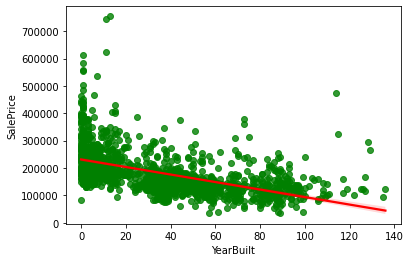

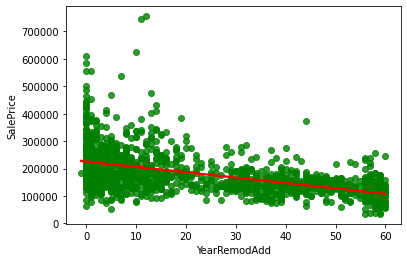

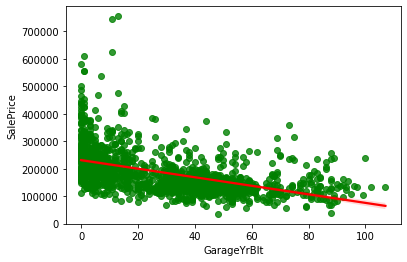

In [18]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    sns.regplot(data=df,x=var, y='SalePrice',
               line_kws={"color":"red"},
               scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Terlihat dari 3 plot di atas bahwa semakin tua usia rumah, usia terakhir direnovasi, dan usia garasi, maka semakin murah harga jual pada rumah. 

Hal ini menjelaskan mengapa harga jual rumah (SalePrice) semakin murah atau menurun setiap tahunnya. 

Hal tersebut karena banyak rumah tua dalam aspek usia, renovasi, dan usia garasi terjual pada tahun tersebut setiap tahunnya.

# Discreate Variable

In [19]:
# Membuat Variable Discreate
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


Variabel diskrit ini cenderung berupa kualifikasi (Qual) atau skala penilaian (Cond), atau mengacu pada jumlah kamar, atau unit (FullBath, GarageCars), atau menunjukkan luas ruangan (KitchenAbvGr).

tentu diharapkan harga yang lebih tinggi, dengan jumlah yang lebih besar.

MoSold adalah bulan di mana rumah dijual.

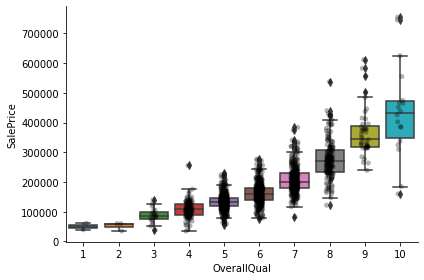

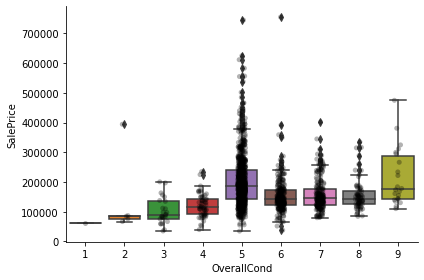

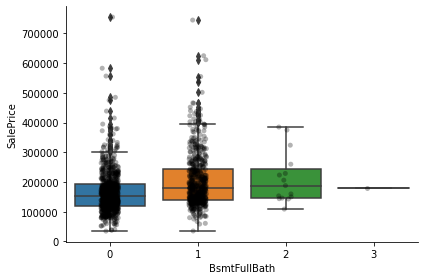

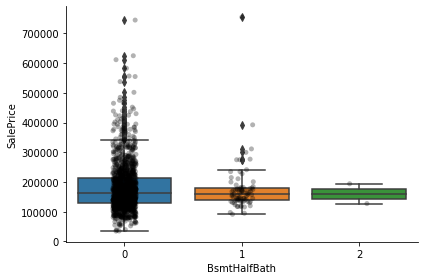

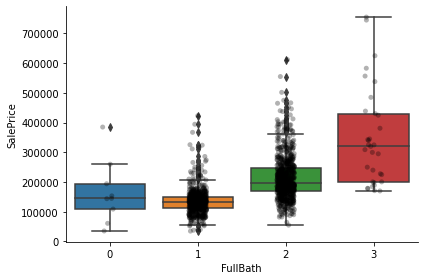

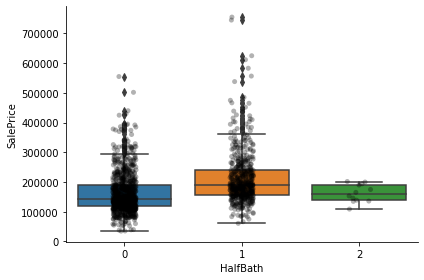

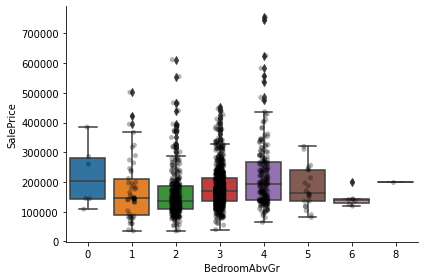

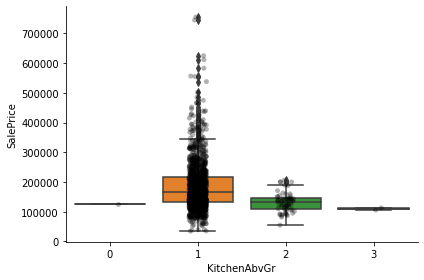

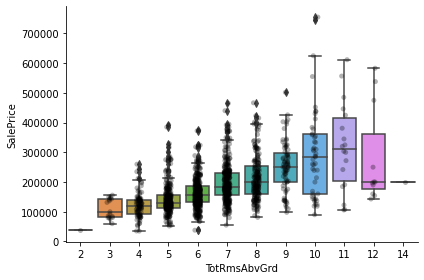

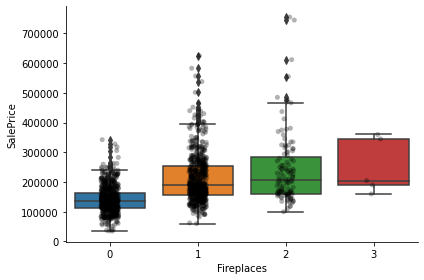

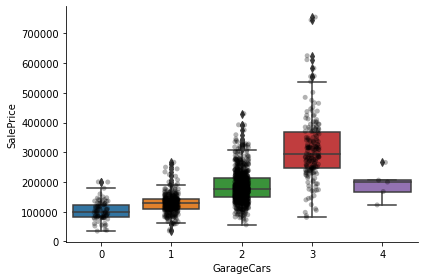

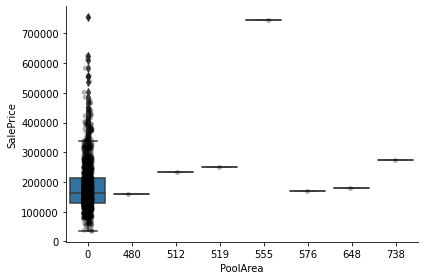

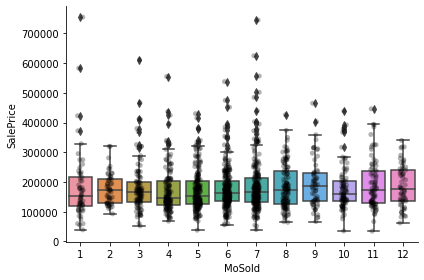

In [20]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Untuk sebagian besar variabel numerik diskrit, terlihat adanya peningkatan harga jual, dengan kualitas, atau kondisi keseluruhan, atau jumlah ruangan, atau permukaan.

Untuk beberapa variabel, tidak terlihat kecenderungan ini. Kemungkinan besar variabel tersebut bukanlah prediktor harga jual yang baik.

# Continous

In [21]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


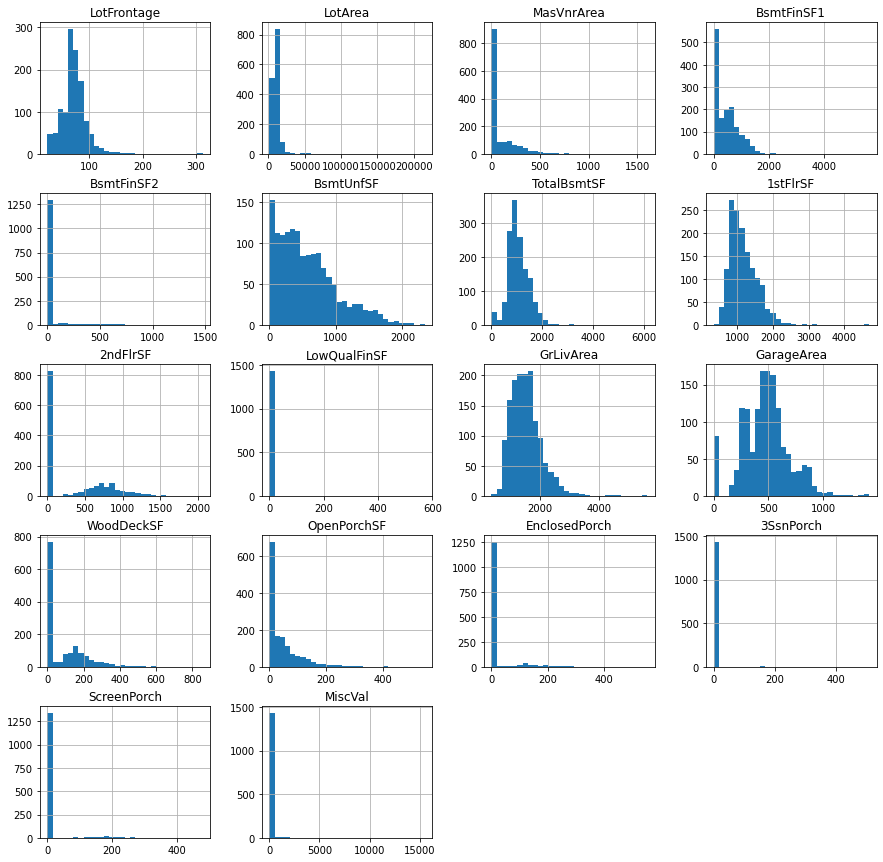

In [22]:
#check ditribusi
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

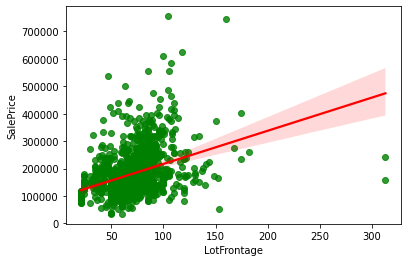

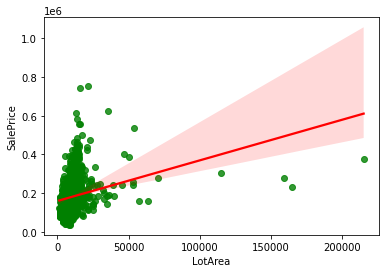

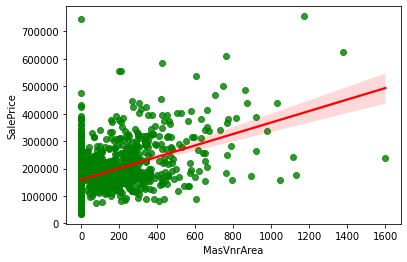

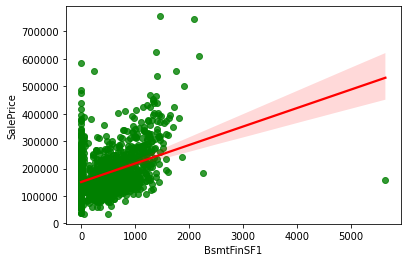

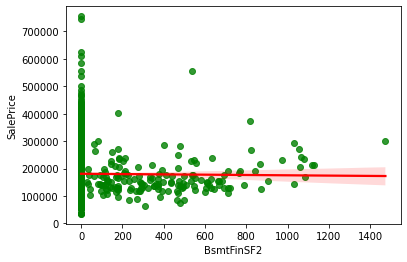

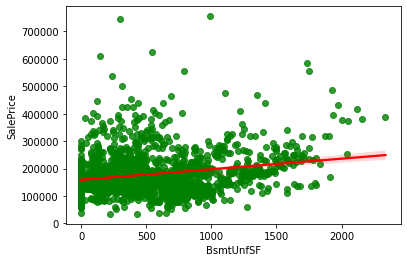

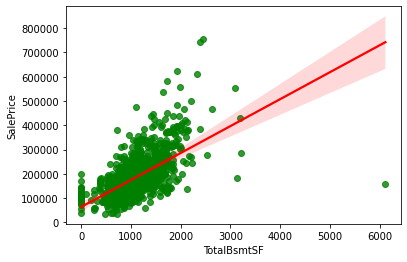

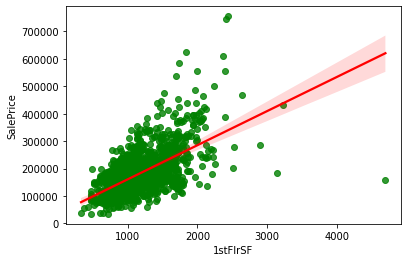

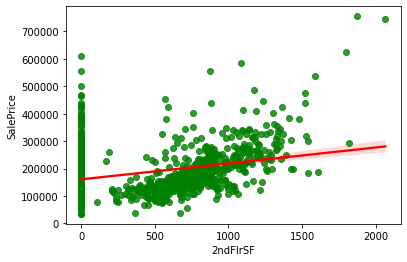

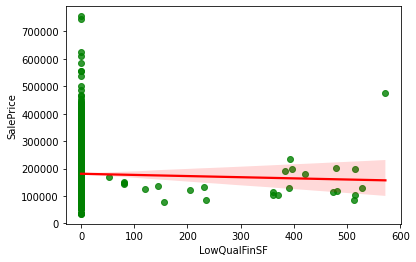

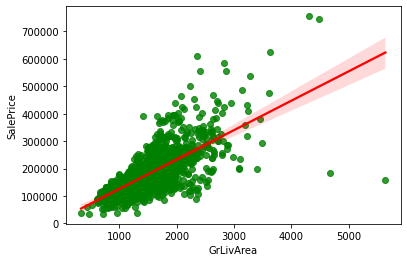

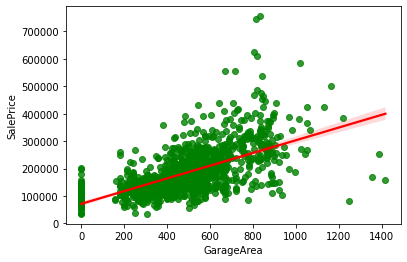

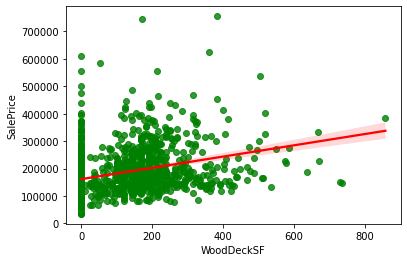

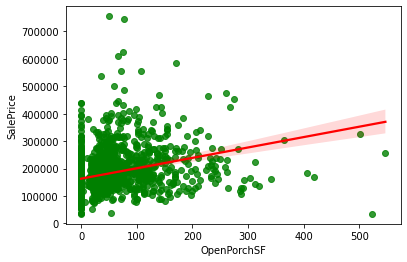

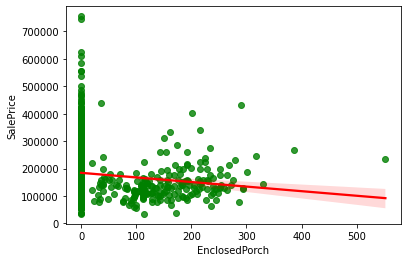

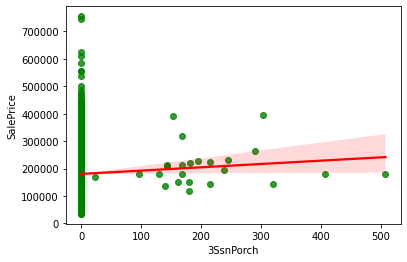

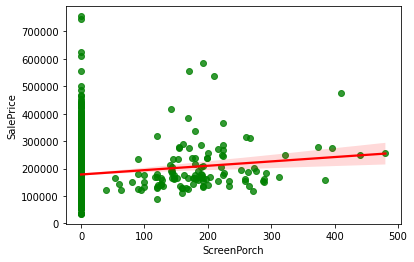

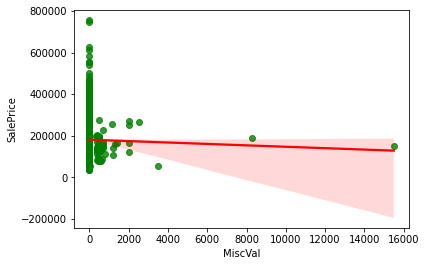

In [23]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=data,x=x,y="SalePrice",
                line_kws={"color":"red"},
                scatter_kws={"color":"g"});

Variabel tidak terdistribusi secara normal. Dan ada beberapa yang sangat skew seperti 3SsnPorch, ScreenPorch dan MiscVal.

Terkadang, mengubah variabel untuk meningkatkan penyebaran nilai, meningkatkan kinerja model. Tetapi tidak mungkin transformasi akan membantu mengubah distribusi variabel super skeww secara dramatis.

Dapat diterapkan transformasi Yeo-Johnson ke variabel seperti LotFrontage, LotArea, BsmUnfSF, dan transformasi biner ke variabel seperti 3SsnPorch, ScreenPorch, dan MiscVal.

In [24]:
#membuat list variable skew

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]


#membuat list variable continuous
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

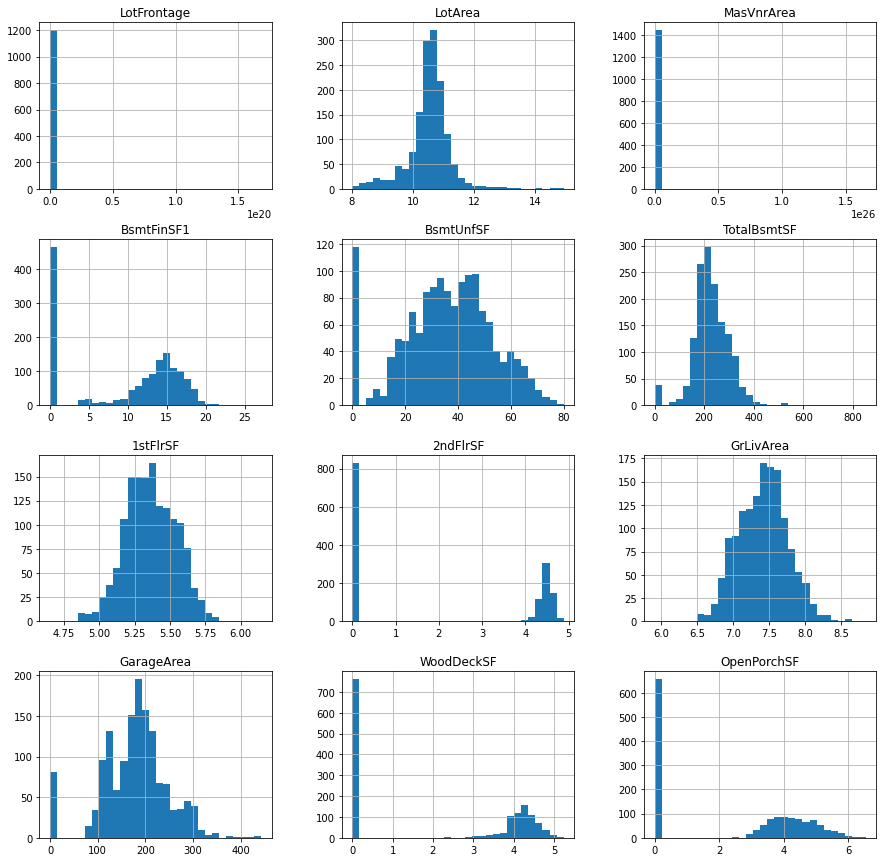

In [25]:
## TRANSFORM Yeo-johnson
# temporary copy of the data
tmp = data.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(data[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

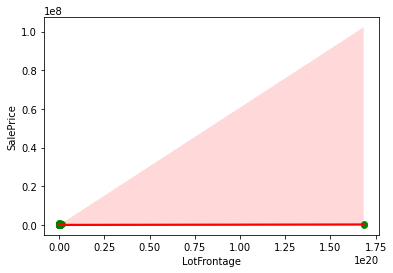

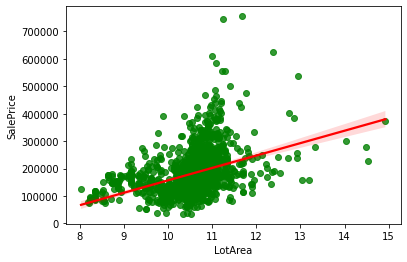

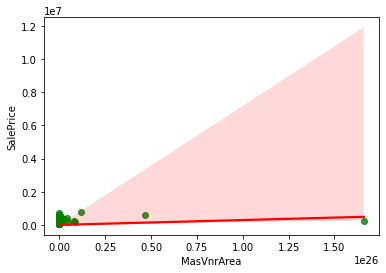

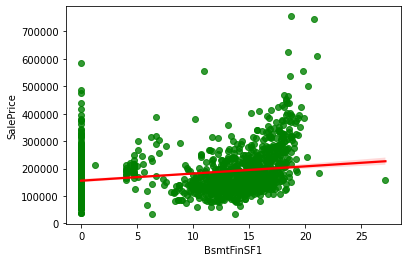

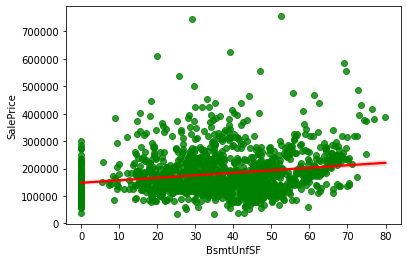

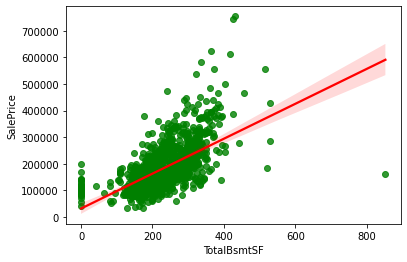

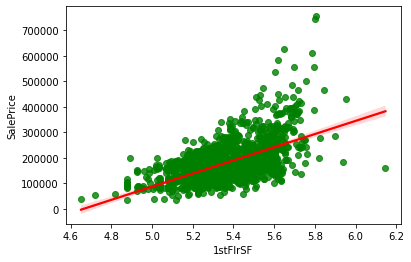

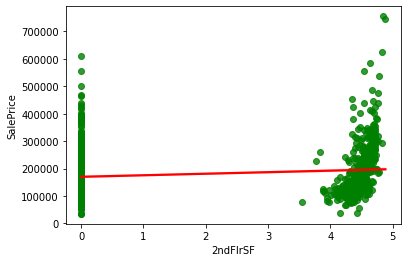

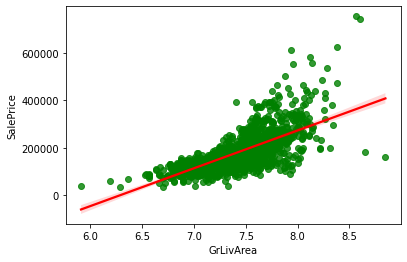

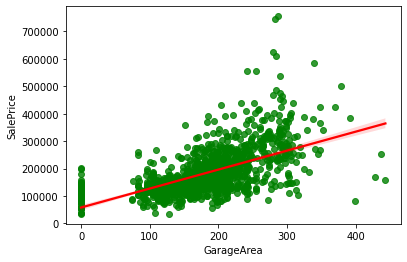

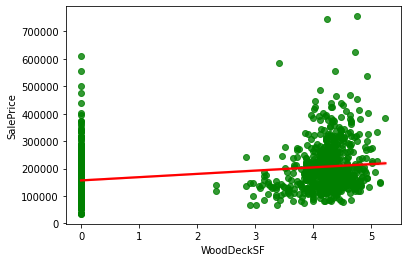

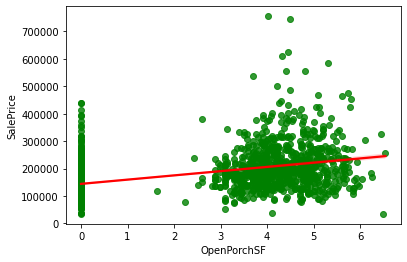

In [26]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=tmp,x=x,y="SalePrice",
                line_kws={"color":"red"},
                scatter_kws={"color":"g"});

Untuk LotFrontage transformasi yeo-johnson tidak berdampak, tetapi transformasi log memberikan dampak pada distribusinya dan MasVnrArea, transformasi tidak berdampak signifikant.

Bagi yang lain, nilai tampaknya tersebar lebih merata dalam rentang tersebut.

Apakah ini membantu meningkatkan daya prediksi ? masih harus dilihat. Untuk menentukan apakah kasus ini, kita harus melatih model dengan nilai asli dan model dengan nilai yang telah di transformasi, dan menentukan performa model, dan feature importance.

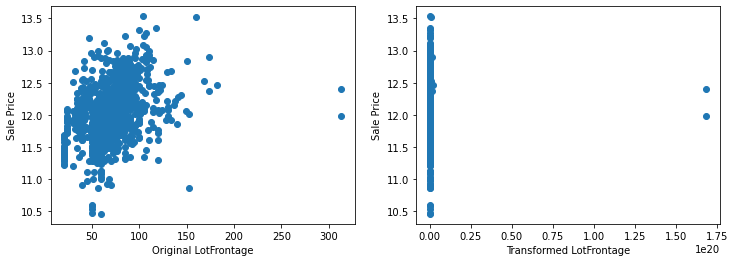

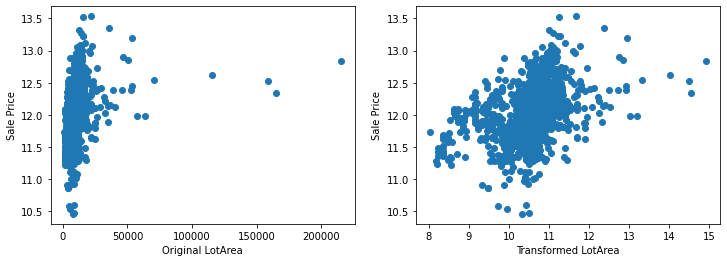

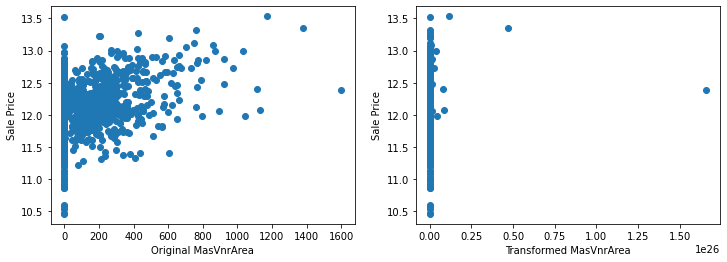

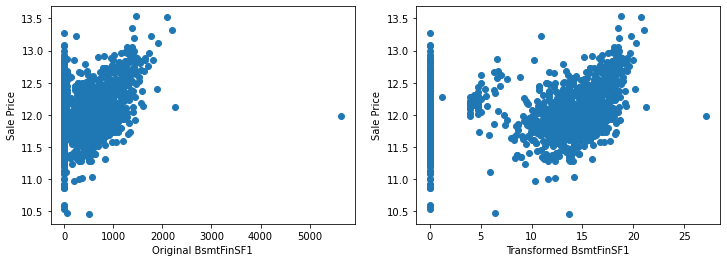

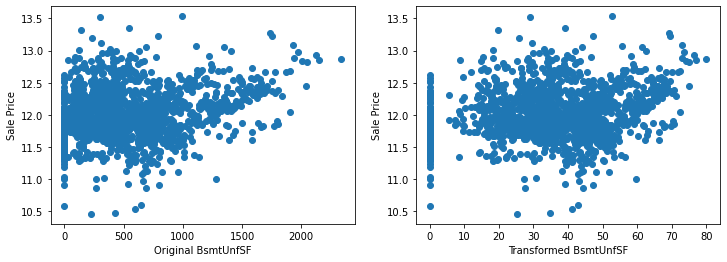

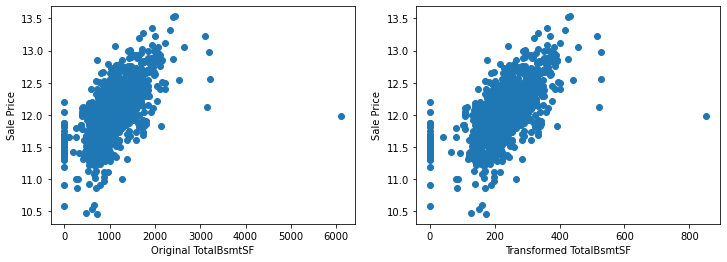

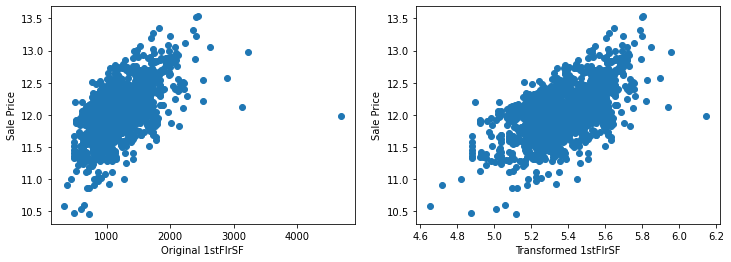

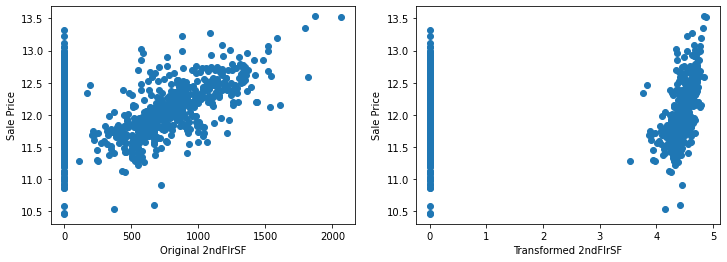

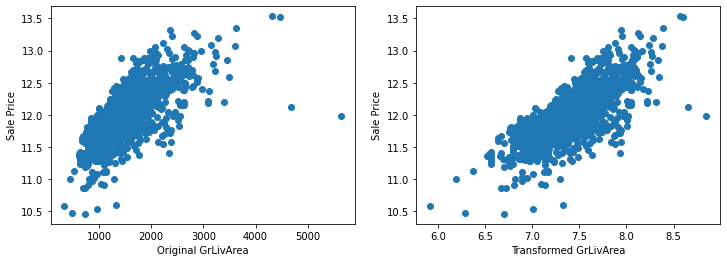

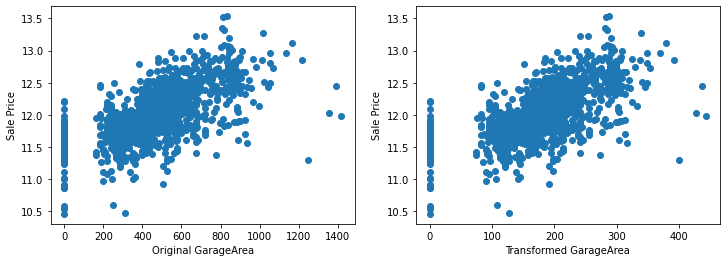

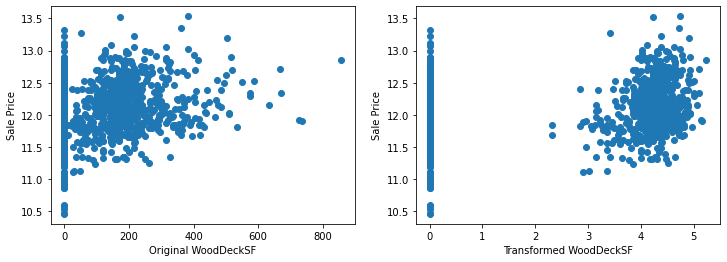

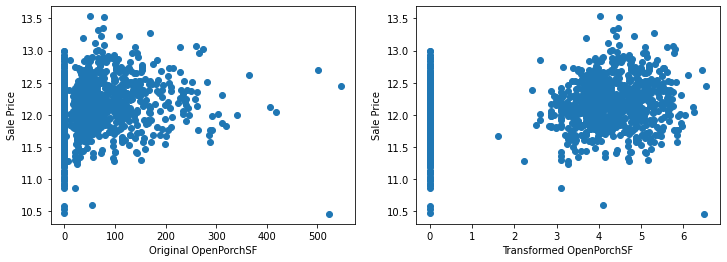

In [27]:
#transform log
for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()